# Projeto Final - Álgebra Linear Computacional
## Ilum - Escola de Ciência / 2° semestre

Professor: Vinicius F. Wasques
Alunos: Andressa C. M. Costa,
        Andriel V. M. da Silva,
        Vitor G. Dreveck

### **Método de decomposição SVD para tratamento de ruído**

O presente trabalho, desenvolvido nas aula de Álgebra Linear Computacional, buscou desenvolver um código para tratar ruído de sinal digitais por meio de decomposição em valores singulares (SVD). O código abaixo é produto disso.

In [8]:
import numpy as np

def auto_valores_auto_vetores(A):
    """ Função para calcular auto valores e auto vetores de uma dada matriz A

    Parâmetros:
        A: uma matriz

    Retornos:
        Auto valore e auto vetores da matriz A
    """
    
    n = A.shape[0]
    auto_valores = np.zeros(n)
    auto_vetores = np.eye(n)
    
    for i in range(n):
        x = np.random.rand(n)
        for _ in range(1000):
            x = np.dot(A, x)
            x /= np.linalg.norm(x)

        auto_valores[i] = np.dot(x.T, np.dot(A, x))
        auto_vetores[:, i] = x
    
    return auto_valores, auto_vetores

In [178]:
import numpy as np

def decomposicao_svd(A):
    """ Função para realizar decomposição SVD.

    Parâmetros:
        A: matriz para realizar a decomposição
    
    Retornos:
        Matrizes U, s e V transposta
    """

    AtA = np.dot(A.T, A)
    AAt = np.dot(A, A.T)
    
    auto_valores_AtA, V = auto_valores_auto_vetores(AtA)
    auto_valores_AAt, U = auto_valores_auto_vetores(AAt)
    
    sorted_indices_AtA = np.argsort(auto_valores_AtA)[::-1]
    sorted_indices_AAt = np.argsort(auto_valores_AAt)[::-1]
    
    auto_valores_AtA = auto_valores_AtA[sorted_indices_AtA]
    V = V[:, sorted_indices_AtA]
    
    auto_valores_AAt = auto_valores_AAt[sorted_indices_AAt]
    U = U[:, sorted_indices_AAt]
    
    singular_values = np.sqrt(auto_valores_AtA)
    
    s = np.zeros((U.shape[0], V.shape[1]), dtype=float)
    min_dimensoes = min(U.shape[0], V.shape[1])
    s[:min_dimensoes, :min_dimensoes] = np.diag(singular_values[:min_dimensoes])
    
    return U, s, V.T

In [179]:
import numpy as np

def svd_denoise(sinal, rank):
    """Recebe um sinal e o nível de ruído e retorna o sinal sem ruído aplicando Decomposição por Valores Singulares (SVD).

    Parâmetros:
        sinal: o sinal cujo ruído se deseja tirar.
        rank: o nível de ruído. Na prática, o número de valores singulares que se deseja manter.

    Retornos:
        denoised_sinal: o sinal sem ruído
    """
    n = len(sinal)
    matrix = np.array([sinal[i:i+rank] for i in range(n - rank + 1)])
    
    U, Sigma, Vt = decomposicao_svd(matrix)
    
    singular_values = np.diag(Sigma).copy()
    singular_values[rank:] = 0
    
    Sigma_denoised = np.zeros_like(Sigma)
    min_dim = min(Sigma.shape)
    Sigma_denoised[:min_dim, :min_dim] = np.diag(singular_values[:min_dim])
    
    denoised_matrix = np.dot(U, np.dot(Sigma_denoised, Vt))
    denoised_signal = np.mean(denoised_matrix, axis=1)
    
    return denoised_signal

In [196]:
t = np.linspace(0, 2 * np.pi, 100)
sinal_original = np.sin(t)

ruido = np.random.normal(0, 0.5, sinal_original.shape)

noisy_signal = sinal_original + ruido

rank = 20  # ajustar esse valor para melhorar a performance
denoised_signal = svd_denoise(noisy_signal, rank)

## Sinal com ruído

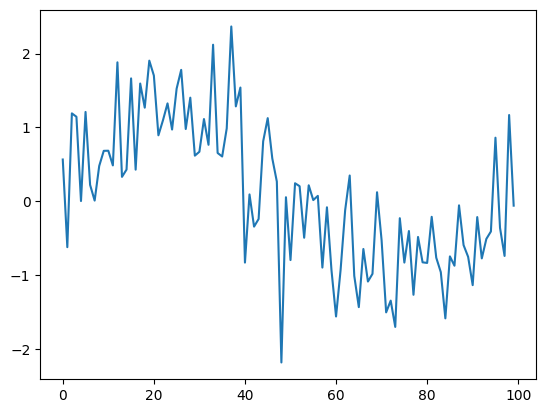

In [197]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots()

sinal = noisy_signal
n = len(sinal)

ax.plot(np.array([i for i in range(n)]), sinal)

## Sinal tratado

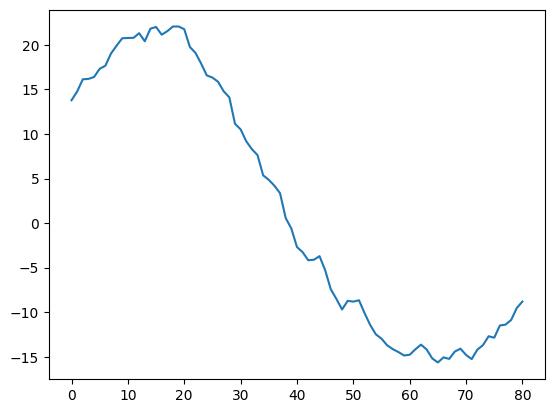

In [198]:
figure, ax = plt.subplots()

ax.plot(np.array([i for i in range(len(denoised_signal))]), denoised_signal)

## Sinal original

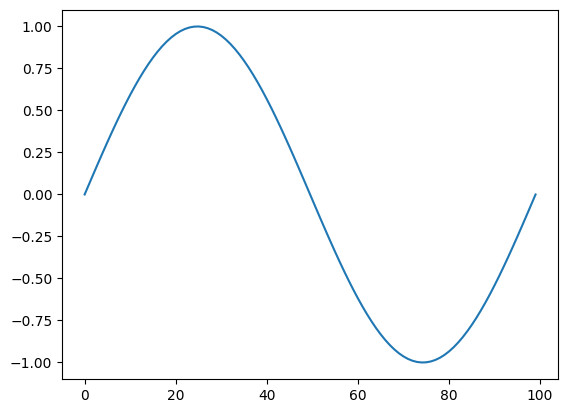

In [199]:
figure, ax = plt.subplots()

ax.plot(np.array([i for i in range(len(sinal_original))]), sinal_original)